# 생선분류:
이것은 도미인가 아닌가

## 도미 데이터 준비하기

In [1]:
# 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

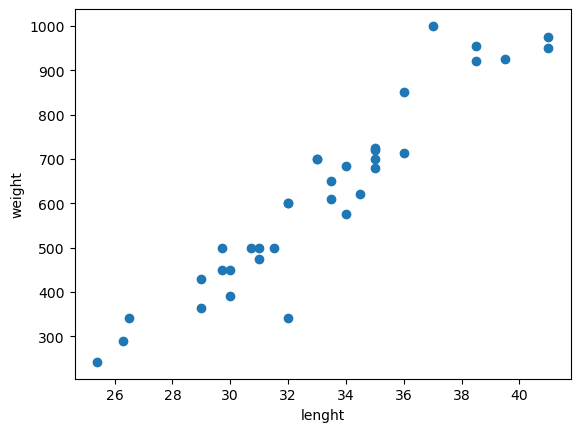

In [2]:
# 도미데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(bream_length,bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 빙어 데이터 준비하기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

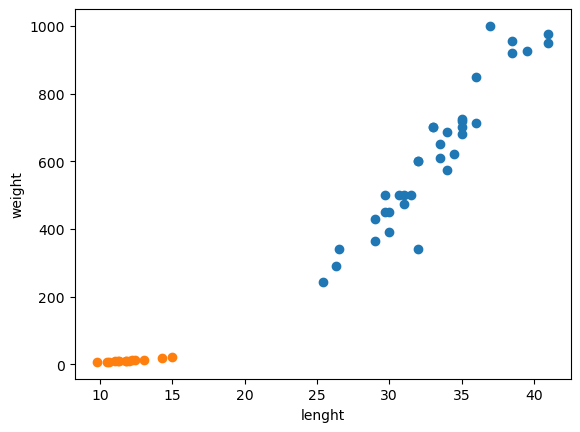

In [6]:
# 빙어 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 프로그램

## 데이터셋 준비

In [15]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [16]:
fish_data = [[l,w] for l,w in zip(length,weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [17]:
fish_target=[1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
print(type(fish_target))

<class 'list'>


## 모델링 단계
* 라이브러리: sklearn

* 알고리즘 준비하기: sklearn 라이브러리의 KNeighborsClassfier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()     # 알고리즘을 객체에 선언

* .fit(데이터셋) : 모델 학습시키기

In [ ]:
kn.fit(fish_data, fish_target)  # .fit()이 학습을 의미하기 때문 -> 이 코드를 지나면 kn이라는 객체는 모델이 됨

* .score(데이터셋) : 학습된 모델 성능평가 -> 정확도 추출 

In [21]:
kn.score(fish_data,fish_target)     # Accuracy(정확도)) 추출

1.0

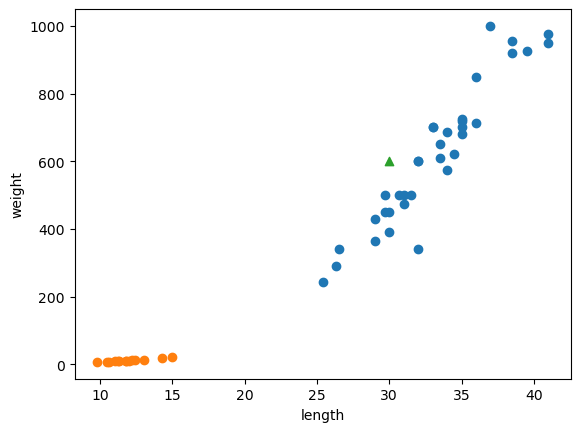

In [22]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* .predict() : 훈련된 모델을 활용해 데이터를 입력하고 예측값 받아보기

In [26]:
# predict
kn.predict([[30,600]])      #예측결과로 array([1]) 출력 : 도미로 판단

array([1])

* ._fix_X : 모델 학습에 사용된 x 값들 확인 (X 대문자 주의)

In [28]:
# 훈련된 x 값들
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


* ._y : 모델 학습에 사용된 y 값들 확인 (y 소문자 주의)

In [31]:
# 훈련된 y 값들
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


# K-최근접 알고리즘

## 속성 n_neighbors 이해하기
- KNeigborsClassfier 알고리즘은 주어진 데이터에 제일 근접한 K개의 데이터를 바탕으로 주어진 데이터가 무엇인지 판단한다
- n_neighbors= k : 제일 근접한 'K'개를 지정하는 속성

## 앞서 학습시킨 생선분류모델 kn에서 근접한 K개를 49로 지정했을 때 생기는 문제 생각해보기

In [38]:
kn49 = KNeighborsClassifier(n_neighbors=49)     # default n_neighbors=5

kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

# 훈련 세트와 테스트 세트 분리하기

In [39]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [40]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14

In [41]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [43]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


## 샘플링 편향 예시

In [44]:
# 분리 1 : 샘플링 편향 예시
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [45]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

In [46]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 샘플링 편향 해결하기 : Numpy 활용

### .array(): 넘파이 배열로 변경

In [77]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

type(fish_data), type(input_arr)

(list, numpy.ndarray)

In [48]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [49]:
print(input_arr.shape)

(49, 2)


### 행렬 값들 섞기
* .shuffle(데이터셋): 데이터셋 랜덤으로 섞어주기, 단 정말로 실시간 랜덤 추출이 아닌 준비된 몇 가지의 랜덤배열들 중 하나를 출력
* .seed(n): 준비된 몇가지의 랜덤배열들 중 n번째로 고정

In [80]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [81]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


### 섞은 행렬에서 데이터셋 만들기

#### 교수님

In [90]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


In [91]:
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


#### 나

In [82]:
input_arr[:35][1][0]

26.3

In [83]:
train_input =[]
train_target=[]

test_input=[]
test_input=[]

for i in range(len(input_arr)):
    if i >= 35:
        train_input.append(input_arr[:][i][0])
        train_target.append(input_arr[:][i][1])
    else:
        test_input.append(input_arr[:][i][0])
        test_input.append(input_arr[:][i][1])

In [84]:
# train_input
# train_target

test_input
# test_input

[25.4,
 242.0,
 26.3,
 290.0,
 26.5,
 340.0,
 29.0,
 363.0,
 29.0,
 430.0,
 29.7,
 450.0,
 29.7,
 500.0,
 30.0,
 390.0,
 30.0,
 450.0,
 30.7,
 500.0,
 31.0,
 475.0,
 31.0,
 500.0,
 31.5,
 500.0,
 32.0,
 340.0,
 32.0,
 600.0,
 32.0,
 600.0,
 33.0,
 700.0,
 33.0,
 700.0,
 33.5,
 610.0,
 33.5,
 650.0,
 34.0,
 575.0,
 34.0,
 685.0,
 34.5,
 620.0,
 35.0,
 680.0,
 35.0,
 700.0,
 35.0,
 725.0,
 35.0,
 720.0,
 36.0,
 714.0,
 36.0,
 850.0,
 37.0,
 1000.0,
 38.5,
 920.0,
 38.5,
 955.0,
 39.5,
 925.0,
 41.0,
 975.0,
 41.0,
 950.0]

### 뭔가

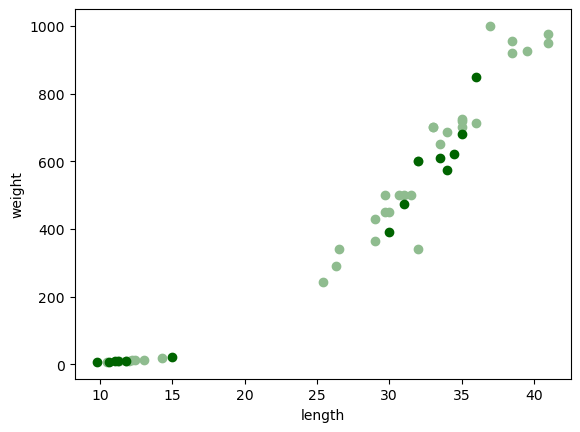

In [94]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1],color='darkseagreen')
plt.scatter(test_input[:,0],test_input[:,1],color='darkgreen')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 분리한 데이터셋으로 확인하기

In [101]:
kn = kn.fit(train_input,train_target)


In [102]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [103]:
kn.score(test_input,kn.predict(test_input))

1.0

# 보너스: sklearn 버전보기

In [96]:
import sklearn
sklearn.__version__

'1.3.0'